In [4]:
from __future__  import print_function, division
import pylab as pl
import pandas as pd
import numpy as np
import os

%pylab inline

if os.getenv ('PUI2016') is None:
    print ("Must set env variable PUI2016")
if os.getenv ('PUIDATA') is None:
    print ("Must set env variable PUI2016")


Populating the interactive namespace from numpy and matplotlib


In [5]:
def getCitiBikeCSV(datestring):
    print ("Downloading", datestring)
    ### First I will heck that it is not already there
    if not os.path.isfile(os.getenv("PUIDATA") + "/" + datestring + "-citibike-tripdata.csv"):
        if os.path.isfile(datestring + "-citibike-tripdata.csv"):
            # if in the current dir just move it
            if os.system("mv " + datestring + "-citibike-tripdata.csv " + os.getenv("PUIDATA")):
                print ("Error moving file!, Please check!")
        #otherwise start looking for the zip file
        else:
            if not os.path.isfile(os.getenv("PUIDATA") + "/" + datestring + "-citibike-tripdata.zip"):
                if not os.path.isfile(datestring + "-citibike-tripdata.zip"):
                    os.system("curl -O https://s3.amazonaws.com/tripdata/" + datestring + "-citibike-tripdata.zip")
                ###  To move it I use the os.system() functions to run bash commands with arguments
                os.system("mv " + datestring + "-citibike-tripdata.zip " + os.getenv("PUIDATA"))
            ### unzip the csv 
            os.system("unzip " + os.getenv("PUIDATA") + "/" + datestring + "-citibike-tripdata.zip")
            ## NOTE: old csv citibike data had a different name structure. 
            if '2014' in datestring:
                os.system("mv " + datestring[:4] + '-' +  datestring[4:] + 
                          "\ -\ Citi\ Bike\ trip\ data.csv " + datestring + "-citibike-tripdata.csv")
            os.system("mv " + datestring + "-citibike-tripdata.csv " + os.getenv("PUIDATA"))
    ### One final check:
    if not os.path.isfile(os.getenv("PUIDATA") + "/" + datestring + "-citibike-tripdata.csv"):
        print ("WARNING!!! something is wrong: the file is not there!")

    else:
        print ("file in place, you can continue")

In [6]:
datestring = 'JC-201801'
getCitiBikeCSV(datestring)

file in place, you can continue


In [7]:
#Display the top few rows of the DF in your notebook. 
df = pd.read_csv(os.getenv("PUIDATA") + "/" + datestring + '-citibike-tripdata.csv')
df['date'] = pd.to_datetime(df['starttime'])
df.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender,date
0,932,2018-01-01 02:06:17.5410,2018-01-01 02:21:50.0270,3183,Exchange Place,40.716247,-74.033459,3199,Newport Pkwy,40.728745,-74.032108,31929,Subscriber,1992,1,2018-01-01 02:06:17.541
1,550,2018-01-01 12:06:18.0390,2018-01-01 12:15:28.4430,3183,Exchange Place,40.716247,-74.033459,3199,Newport Pkwy,40.728745,-74.032108,31845,Subscriber,1969,2,2018-01-01 12:06:18.039
2,510,2018-01-01 12:06:56.9780,2018-01-01 12:15:27.8100,3183,Exchange Place,40.716247,-74.033459,3199,Newport Pkwy,40.728745,-74.032108,31708,Subscriber,1946,1,2018-01-01 12:06:56.978
3,354,2018-01-01 14:53:10.1860,2018-01-01 14:59:05.0960,3183,Exchange Place,40.716247,-74.033459,3267,Morris Canal,40.712419,-74.038526,31697,Subscriber,1994,1,2018-01-01 14:53:10.186
4,250,2018-01-01 17:34:30.1920,2018-01-01 17:38:40.9840,3183,Exchange Place,40.716247,-74.033459,3639,Harborside,40.719252,-74.034234,31861,Subscriber,1991,1,2018-01-01 17:34:30.192


In [8]:
df.columns

Index(['tripduration', 'starttime', 'stoptime', 'start station id',
       'start station name', 'start station latitude',
       'start station longitude', 'end station id', 'end station name',
       'end station latitude', 'end station longitude', 'bikeid', 'usertype',
       'birth year', 'gender', 'date'],
      dtype='object')

- Null Hypothesis: Male bikers who rided citibike during Jan 2018 have the same or shorter trip duration during Jan 2018 than female bikers who rided citibike during Jan 2018 do.
- Alternative Hypothesis: Male bikers who rided citibike during Jan 2018 have longer trip duration during Jan 2018 than female bikers who rided citibike during Jan 2018 do. 
- H_0 = P_m - P_f <= 0 
- H_a = P_m - P_f > 0 , where P_m is male bikers' trip duration and P_f is female bikers' trip duration. (significance level alpha = 0.05)

In [9]:
df.drop(['starttime', 'stoptime', 'start station id',
       'start station name', 'start station latitude',
       'start station longitude', 'end station id', 'end station name',
       'end station latitude', 'end station longitude', 'bikeid', 'usertype',
         'birth year', 'date'], axis=1, inplace=True)

In [10]:
#Display the reducted dataframe (with .head() for example). 
df.head()

,tripduration,gender
0,932,1
1,550,2
2,510,1
3,354,1
4,250,1


In [11]:
df.describe()

,tripduration,gender
count,1.267700e+04,12677.000000
mean,5.332873e+02,1.159580
std,9.382227e+03,0.449059
min,6.100000e+01,0.000000
25%,2.160000e+02,1.000000
50%,3.040000e+02,1.000000
75%,4.660000e+02,1.000000
max,1.037896e+06,2.000000


In [12]:
duration_mean = df['tripduration'].mean()

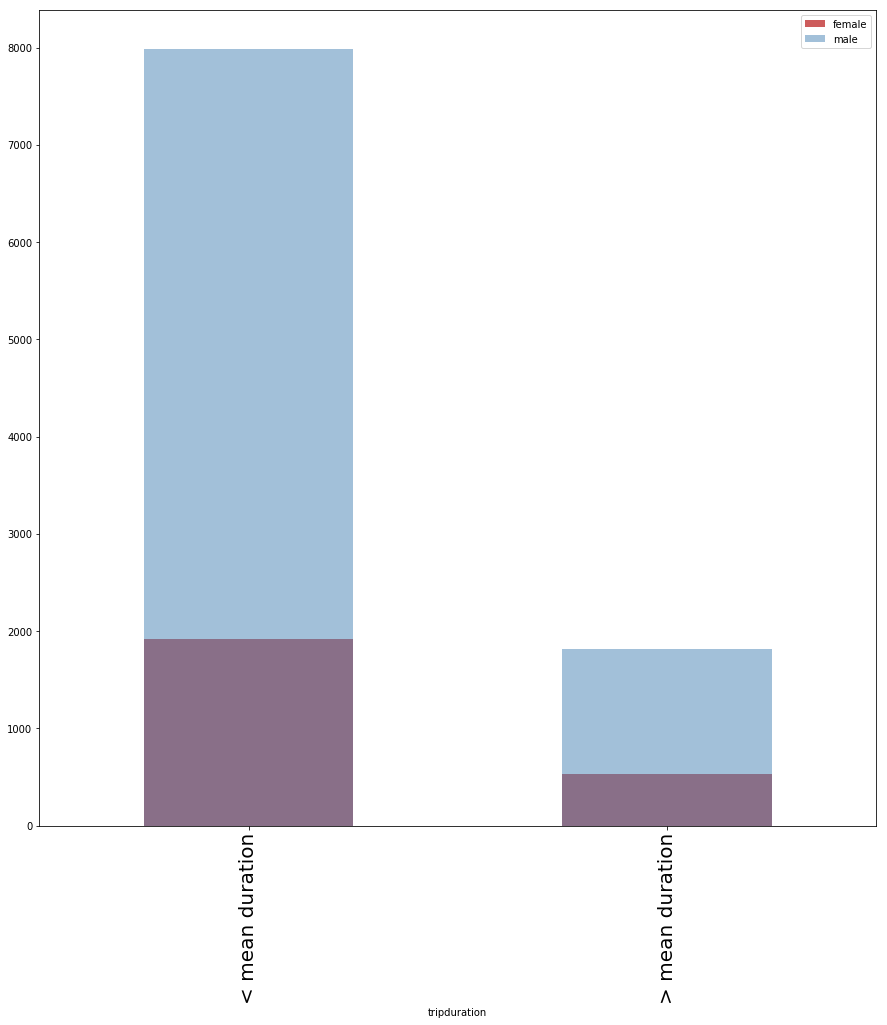

In [13]:
fig = pl.figure(figsize(15,15))

#instad of plotting with matplotlib i.e. plot() i use the plot method in pandas
norm_w = 1
((df['tripduration'][df['gender'] == 2].groupby([df['tripduration'] > duration_mean]).count()) / norm_w).plot(kind="bar", 
                                                                                         color='IndianRed', 
                                                                                         label='female')

norm_m = 1
ax = ((df['tripduration'][df['gender'] == 1].groupby([df['tripduration'] > duration_mean]).count()) / norm_m).plot(kind="bar", 
                                                                                              color='SteelBlue', 
                                                                                              alpha=0.5,
                                                                                              label='male')

tmp = ax.xaxis.set_ticklabels(['< mean duration', '> mean duration'], fontsize=20)
pl.legend()

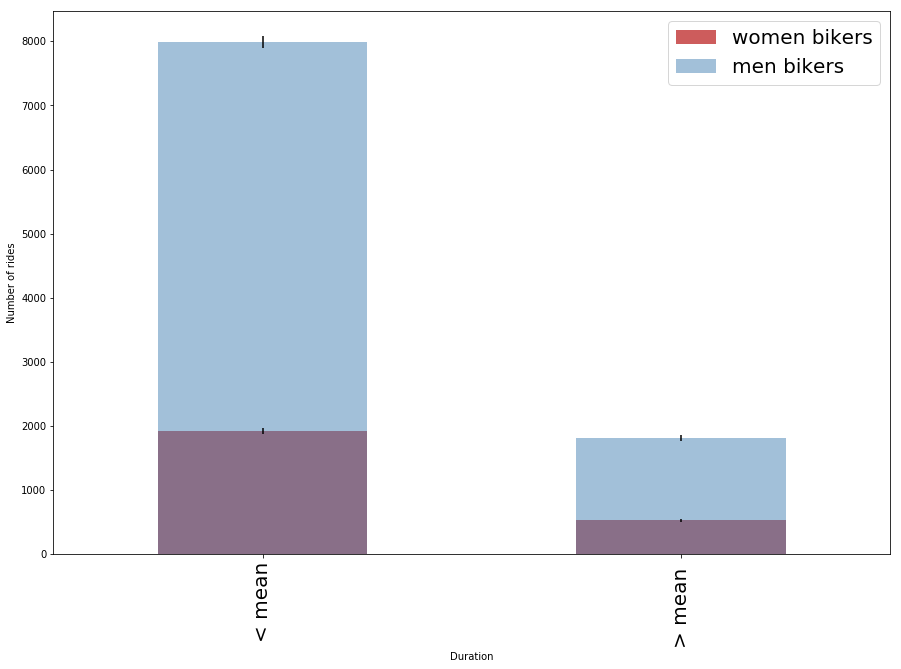

In [14]:
fig=pl.figure(figsize(15,10))

counts_w = df.tripduration[df.gender == 2].groupby([df['tripduration'] > duration_mean]).count()
norm_w = 1
error_w = np.sqrt(counts_w)
ax=((counts_w) / norm_w).plot(kind="bar",color='IndianRed',  yerr=[
            ((error_w) / norm_w, (error_w) / norm_w)], label='women bikers')


counts_m = df.tripduration[df.gender==1].groupby([df['tripduration'] > duration_mean]).count()
norm_m = 1
error_m=np.sqrt(counts_m)
((counts_m) / norm_m).plot(kind="bar", alpha=0.5, yerr=[((error_m) / norm_m, (error_m) / norm_m)], 
                           color='SteelBlue', label='men bikers')
ax.xaxis.set_ticklabels(['< mean', '> mean '], fontsize=20)
ax.set_ylabel ("Number of rides")
ax.set_xlabel ("Trip Duration")
pl.legend(['women bikers','men bikers'],fontsize=20)

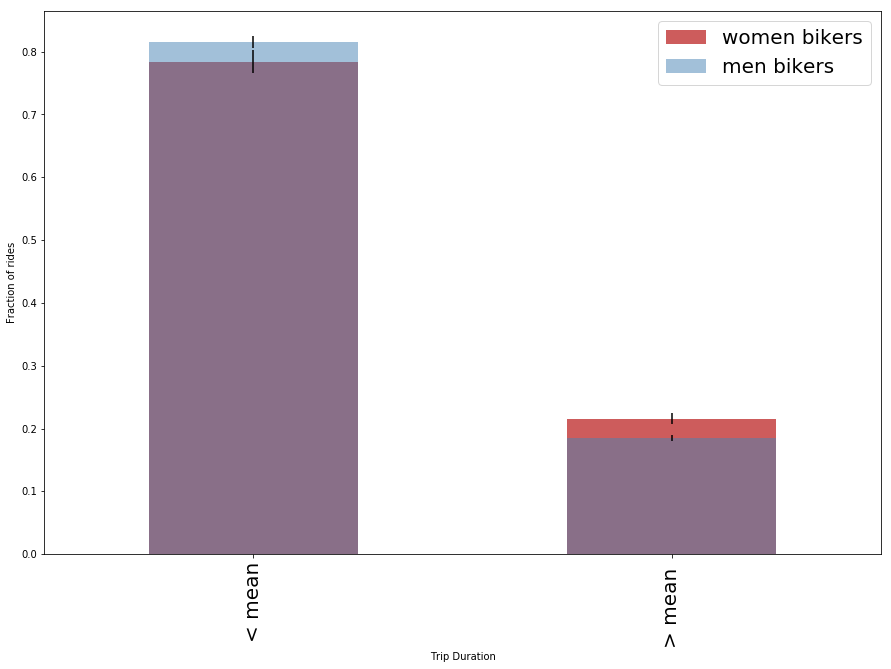

In [15]:
fig = pl.figure(figsize(15,10))

norm_w = counts_w.sum()
error_w = np.sqrt(counts_w)
((counts_w) / norm_w).plot(kind="bar", color='IndianRed',  
                           yerr=[((error_w) / norm_w, (error_w) / norm_w)], 
                           label='women bikers')

norm_m = counts_m.sum()
ax = ((counts_m) / norm_m).plot(kind="bar", alpha=0.5, 
                                yerr=[((error_m) / norm_m, (error_m) / norm_m)], 
                                color='SteelBlue', label='men bikers')

ax.xaxis.set_ticklabels(['< mean', '> mean '], fontsize=20)
ax.set_ylabel ("Fraction of rides")
ax.set_xlabel ("Trip Duration")

pl.legend(['women bikers','men bikers'],fontsize=20)